In [ ]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint #DDE solver, http://zulko.github.io/blog/2013/10/22/delay-differential-equations-in-python/
#import biocircuits as bs
#from jitcdde import t, y, jitcdde #DDE solver, docs at https://jitcdde.readthedocs.io/en/stable/
#link to published model: https://www.pnas.org/action/downloadSupplement?doi=10.1073%2Fpnas.1014418108&file=pnas.201014418SI.pdf

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


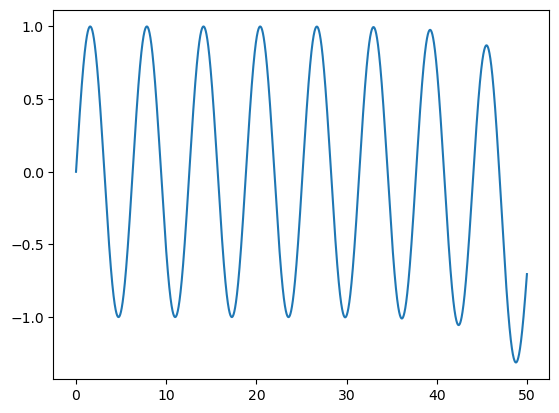

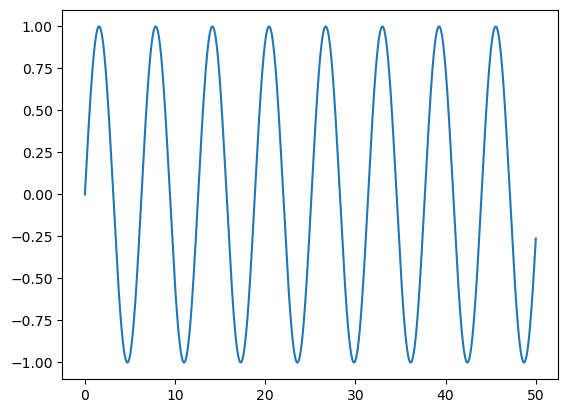

In [3]:
#ddeint test code to make sure it works correctly and I can recapitulate their example on my machine
model = lambda Y,t : Y(t - 3*np.pi/2)

t = np.linspace(0,50,10000) # Time start, time end, nb of points/steps
g = np.sin # Expression of Y(t) before the integration interval
y = ddeint(model,g,t) # Solving

plt.plot(t, y)
plt.show()

plt.plot(t, g(t))
plt.show()

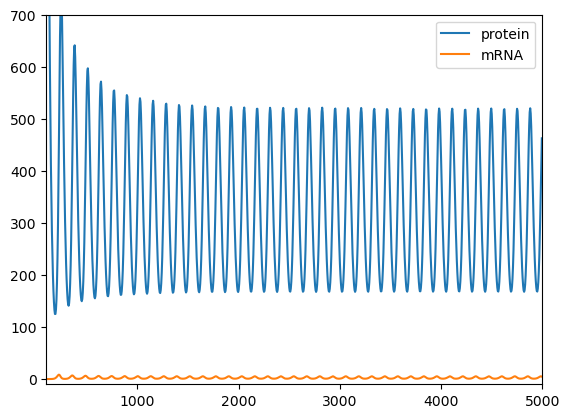

In [6]:
#define parameters (taken from PNAS paper)
Tp = 8
Tm = 35                        #variable depending on intron lengths
rate_translate = 4.5
transcript_no_inhib = 33
P_half_max = 40
tauP = 20
tauM = 3

#set initial values
Minit = 0
Pinit = 0

#define system of ddes
def model(MP, t, Tp, Tm, a, k, Pcrit, tauP, tauM):
    p, m = MP(t)
    dm = MP(t - Tp)[1]
    dp = MP(t - Tm)[0]
    dmpdt = np.array([
        (a * dm) - ((np.log(2) / tauP) * p),
        (k / ((1 + (dp / Pcrit)) ** 2)) - ((np.log(2) / tauM) * m)
    ])
    return dmpdt

#initial conditions
g = lambda t:np.array([Pinit,Minit])
#time array
tt = np.arange(0, 5000, 5)
#solve & plot
pm = ddeint(model,g,tt,fargs=(Tp, Tm, rate_translate, transcript_no_inhib, P_half_max, tauP, tauM))
plt.plot(tt, pm[:,0], label = "protein")
plt.plot(tt, pm[:,1], label = "mRNA")
plt.ylim((-10, 700))
plt.xlim((100, 5000))
plt.legend()
plt.show()